In [1]:
#Basic pre-reqs:
import numpy as np
import os
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
version_nums = torch.__version__.split('.')
# Torch Geometric seems to always build for *.*.0 of torch :
version_nums[-1] = '0' + version_nums[-1][1:]
os.environ['TORCH'] = '.'.join(version_nums)
 
%pip install --upgrade torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}.html
%pip install --upgrade torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}.html
%pip install --upgrade torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-{TORCH}.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-312
      creating build/lib.linux-x86_64-cpython-312/torch_scatter
      copying torch_scatter/__init__.py -> build/lib.linux-x86_64-cpython-312/torch_scatter
      copying torch_scatter/placeholder.py -> build/lib.linux-x86_64-cpython-312/torch_scatter
      copying torch_scatter/scatter.py -> build/lib.linux-x86_64-cpython-312/torch_scatter
      copying torch_scatter/segment_coo.py -> build/lib.linux-x86_64-cpython-312/torch_scatter
      copying torch_scatter/testing.py -> build/lib.linux-x86_64-cpython-312/torch_scatter
      copying torch_scatte

In [4]:
!wget https://raw.githubusercontent.com/MilesCranmer/symbolic_deep_learning/master/models.py -O models.py
!wget https://raw.githubusercontent.com/MilesCranmer/symbolic_deep_learning/master/simulate.py -O simulate.py

--2024-06-20 15:06:22--  https://raw.githubusercontent.com/MilesCranmer/symbolic_deep_learning/master/models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9647 (9,4K) [text/plain]
Saving to: ‘models.py’

models.py           100%[===================>]   9,42K  --.-KB/s    in 0,001s  

2024-06-20 15:06:22 (14,2 MB/s) - ‘models.py’ saved [9647/9647]

--2024-06-20 15:06:23--  https://raw.githubusercontent.com/MilesCranmer/symbolic_deep_learning/master/simulate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9752 (9,5K) [text/p

In [5]:
%pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 MB 6.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 541.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.1/895.1 kB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import models
import simulate

In [4]:
import torch
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.version.cuda)


torch.ones(1).cuda()

True
2.3.1
12.1


tensor([1.], device='cuda:0')

In [5]:
# Number of simulations to run (it's fast, don't worry):
ns = 10000
# Potential (see below for options)
sim = 'spring'
# Number of nodes
n = 4
# Dimension
dim = 2
# Number of time steps
nt = 1000


#Standard simulation sets:
n_set = [4, 8]
sim_sets = [
 {'sim': 'r1', 'dt': [5e-3], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
 {'sim': 'r2', 'dt': [1e-3], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
 {'sim': 'spring', 'dt': [1e-2], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
 {'sim': 'string', 'dt': [1e-2], 'nt': [1000], 'n': [30], 'dim': [2]},
 {'sim': 'charge', 'dt': [1e-3], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
 {'sim': 'superposition', 'dt': [1e-3], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
 {'sim': 'damped', 'dt': [2e-2], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
 {'sim': 'discontinuous', 'dt': [1e-2], 'nt': [1000], 'n': n_set, 'dim': [2, 3]},
]


#Select the hand-tuned dt value for a smooth simulation
# (since scales are different in each potential):
dt = [ss['dt'][0] for ss in sim_sets if ss['sim'] == sim][0]

title = '{}_n={}_dim={}_nt={}_dt={}'.format(sim, n, dim, nt, dt)
print('Running on', title)

Running on spring_n=4_dim=2_nt=1000_dt=0.01


In [10]:
from simulate import SimulationDataset
s = SimulationDataset(sim, n=n, dim=dim, nt=nt//2, dt=dt)
# Update this to your own dataset, or regenerate:
base_str = './'
data_str = title
s.simulate(ns)

In [11]:
data = s.data
s.data.shape

(10000, 500, 4, 6)

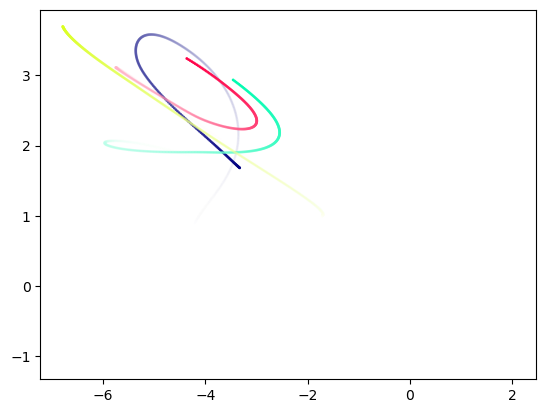

In [14]:
s.plot(0, animate=True, plot_size=False)

In [15]:
accel_data = s.get_acceleration()

In [16]:
X = torch.from_numpy(np.concatenate([s.data[:, i] for i in range(0, s.data.shape[1], 5)]))
y = torch.from_numpy(np.concatenate([accel_data[:, i] for i in range(0, s.data.shape[1], 5)]))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [19]:
import torch
from torch import nn
from torch.functional import F
from torch.optim import Adam
from torch_geometric.nn import MetaLayer, MessagePassing
from models import OGN, varOGN, make_packer, make_unpacker, get_edge_index

In [20]:
aggr = 'add'
hidden = 300

test = '_l1_'

#This test applies an explicit bottleneck:

msg_dim = 100
n_f = data.shape[3]

In [21]:

from torch_geometric.data import Data, DataLoader
from models import get_edge_index
edge_index = get_edge_index(n, sim)

In [23]:
if test == '_kl_':
    ogn = varOGN(n_f, msg_dim, dim, dt=0.1, hidden=hidden, edge_index=get_edge_index(n, sim), aggr=aggr).cuda()
else:
    ogn = OGN(n_f, msg_dim, dim, dt=0.1, hidden=hidden, edge_index=get_edge_index(n, sim), aggr=aggr).cuda()

messages_over_time = []
ogn = ogn.cuda()

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
